### Preprocees and combine the data sets ###

In [41]:
import matplotlib.pyplot as plt

In [3]:
import os
import pandas as pd

# Folder containing your CSV files
folder_path = "C:\\Users\\Administrator\\Desktop\\Crypto Trade\\Analysis Crypto"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Loop through files and append to the combined DataFrame
for file in csv_files:
    temp_df = pd.read_csv(os.path.join(folder_path, file))
    temp_df['currency'] = file.split('.')[0]  # Add a column to identify the currency
    combined_df = pd.concat([combined_df, temp_df])

# Convert timestamp to datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

print(combined_df.head())


   timestamp    adjclose        open        high    volume         low  \
0 2014-09-17  457.334015  465.864014  468.174011  21056800  452.421997   
1 2014-09-18  424.440002  456.859985  456.859985  34483200  413.104004   
2 2014-09-19  394.795990  424.102997  427.834991  37919700  384.532013   
3 2014-09-20  408.903992  394.673004  423.295990  36863600  389.882996   
4 2014-09-21  398.821014  408.084991  412.425995  26580100  393.181000   

        close currency  
0  457.334015  BTC-USD  
1  424.440002  BTC-USD  
2  394.795990  BTC-USD  
3  408.903992  BTC-USD  
4  398.821014  BTC-USD  


In [9]:
combined_df.to_csv("combined_df.csv", index=False)

In [13]:
combined_df.count()

timestamp    7406
adjclose     7406
open         7406
high         7406
volume       7406
low          7406
close        7406
currency     7406
dtype: int64

In [15]:
combined_df = combined_df.dropna()

In [17]:
combined_df.count()

timestamp    7406
adjclose     7406
open         7406
high         7406
volume       7406
low          7406
close        7406
currency     7406
dtype: int64

In [19]:
#Step 3: Ensure all numeric columns are in correct format
numeric_columns = ['adjclose', 'open', 'high', 'low', 'close', 'volume']
combined_df[numeric_columns] = combined_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [31]:
#check data types
combined_df.dtypes

timestamp    datetime64[ns]
adjclose            float64
open                float64
high                float64
volume                int64
low                 float64
close               float64
currency             object
dtype: object

In [37]:
# Sort the dataframe by timestamp to ensure chronological order
combined_df.sort_values('timestamp', inplace=True)

### Data Analysis ###

In [35]:
# Step 2: Check descriptive statistics
print(combined_df.describe())

                           timestamp      adjclose          open  \
count                           7406   7406.000000   7406.000000   
mean   2019-10-28 04:11:53.397245440   5305.926027   5303.999460   
min              2014-09-17 00:00:00      0.515273      0.513391   
25%              2018-07-01 00:00:00      1.018373      1.017532   
50%              2020-03-09 00:00:00    314.010498    314.011002   
75%              2021-06-22 18:00:00   3908.051392   3908.645020   
max              2022-09-28 08:55:00  67566.828125  67549.734375   
std                              NaN  11960.086863  11961.585687   

               high        volume           low         close  
count   7406.000000  7.406000e+03   7406.000000   7406.000000  
mean    5442.754666  1.950246e+10   5148.658064   5305.926027  
min        0.559759  6.520200e+05      0.505194      0.515273  
25%        1.041597  1.550047e+09      1.008115      1.018373  
50%      320.350998  8.777899e+09    303.866226    314.010498  
75%

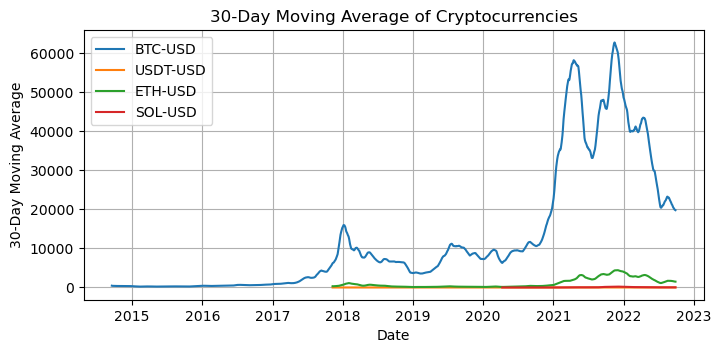

In [45]:
# Calculate the moving average (e.g., 30-day moving average) for 'close' price
combined_df['30_day_MA'] = combined_df.groupby('currency')['close'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Plotting the moving averages for each currency
currencies = combined_df['currency'].unique()

plt.figure(figsize=(8, 3.5))

for currency in currencies:
    currency_data = combined_df[combined_df['currency'] == currency]
    plt.plot(currency_data['timestamp'], currency_data['30_day_MA'], label=currency)

plt.title('30-Day Moving Average of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('30-Day Moving Average')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [47]:
# Calculate Daily Returns
combined_df['daily_return'] = combined_df.groupby('currency')['close'].pct_change() * 100

In [49]:
combined_df

,timestamp,adjclose,open,high,volume,low,close,currency,30_day_MA,daily_return
0,2014-09-17 00:00:00,457.334015,465.864014,468.174011,21056800,452.421997,457.334015,BTC-USD,457.334015,NaN
1,2014-09-18 00:00:00,424.440002,456.859985,456.859985,34483200,413.104004,424.440002,BTC-USD,440.887009,-7.192558
2,2014-09-19 00:00:00,394.795990,424.102997,427.834991,37919700,384.532013,394.795990,BTC-USD,425.523336,-6.984265
3,2014-09-20 00:00:00,408.903992,394.673004,423.295990,36863600,389.882996,408.903992,BTC-USD,421.368500,3.573492
4,2014-09-21 00:00:00,398.821014,408.084991,412.425995,26580100,393.181000,398.821014,BTC-USD,416.859003,-2.465854
...,...,...,...,...,...,...,...,...,...,...
1783,2022-09-27 00:00:00,0.999980,0.999984,1.000096,71681603882,0.999951,0.999980,USDT-USD,1.000074,-0.001001
1784,2022-09-28 08:54:00,1281.931763,1330.269531,1336.616089,17950496768,1272.992798,1281.931763,ETH-USD,1496.176579,-3.623406
901,2022-09-28 08:54:00,32.203831,32.723389,32.869263,1109805184,31.742867,32.203831,SOL-USD,32.794334,-1.668082
1784,2022-09-28 08:54:00,1.000002,0.999972,1.000020,68453601280,0.999920,1.000002,USDT-USD,1.000073,0.002170


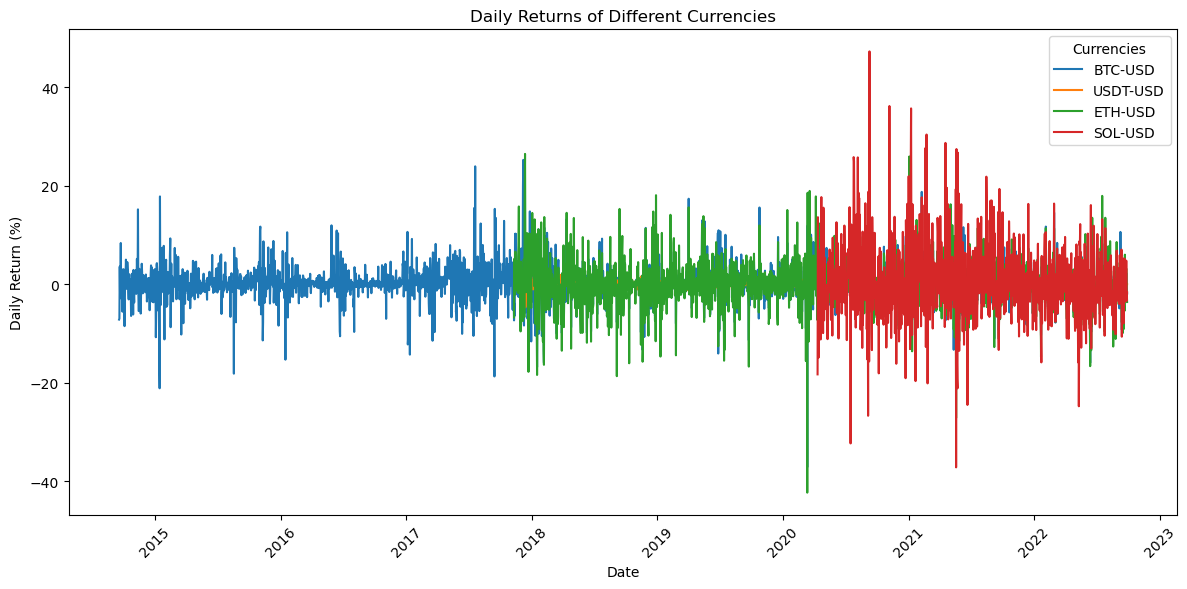

In [61]:
# Plot daily returns for each currency
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Plotting the daily returns for each currency
for currency in combined_df['currency'].unique():
    currency_data = combined_df[combined_df['currency'] == currency]
    plt.plot(currency_data['timestamp'], currency_data['daily_return'], label=currency)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Returns of Different Currencies')
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.legend(title='Currencies')
plt.tight_layout()

# Show the plot
plt.show()
